# Vocab Analysis
## Section 3: Analyze the Data

### 1. Import necessary libraries

In [732]:
# %load da_vocab_utility.py
# TDD backbone assertion to confirm a function call returns the desired result
def assertEquals(actual, expected, desc):
    assert(actual==expected), desc + " result: " + str(actual) + ", expected: " + str(expected)
    return "OK"
	
# check that two lists have the same contents
def lists_equal(a,b):
    return (a == b).all()
	

# shallow check (by row) for duplicates
def has_dupes(df_in):
    dupe = df_in.duplicated()
    return df_in.loc[dupe].shape[0] != 0
	
def print_line_break():
    print("-"*75)
	
def print_before_after(b, a, t=""):
    if t != "":
        print_line_break()
        print(t)
    print_line_break()
    print("Before: " + str(b))
    print_line_break()
    print("After: " + str(a))
    print_line_break()
	
def time_it(func, *args, **kwargs):
    start = time.time()
    func(*args, **kwargs)
    end = time.time()
    # https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python
    print("{:.0f}".format((end - start)*1000) + " miliseconds")
	
def has_dupe_terms(df_in):
    location = df_in['Term'].duplicated()
    return df_in.loc[location].shape[0] != 0
	
def get_rows_by_value_in_col(df_in, value, col):
    return df_in.loc[df_in[col]==value]
	
# Converts a tag string to a list to a set back to a string (this removes the duplicates)
def remove_dupes(t):
    temp = list(set(t.lower().split()))
    return ' '.join(temp) # return as string
	
# determines if an individual tag substring exists in a larger tags list string
def tag_exists(tags, tag):
    return 1 if tag in tags.split() else 0
	
def is_blank (s):
    return not (s and s.strip())
	
def get_frame_of_cards_by_term(df, t):
    return df.loc[df['Term']==t]
	

In [733]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [734]:
# show all columns
pd.options.display.max_columns = None

In [735]:
image_cnt = 0

In [736]:
def save_fig_a(x):
    plt.savefig("analyze_" + str(x)+".png")

### 2. Import necessary datasets

In [737]:
# https://stackoverflow.com/questions/36977223/how-should-i-read-a-csv-file-without-the-unnamed-row-with-pandas?noredirect=1&lq=1
# import notes
notes_location = "datasets/df_notes_019_final_section_2.csv"
df_notes = pd.read_csv(notes_location, index_col=[0])

# import cards
cards_location = "datasets/df_cards_011_mid_section_2.csv"
df_cards = pd.read_csv(cards_location, index_col=[0])

# todo: import revlog

In [738]:
df_notes.head()

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,n1,n2,n3,n4,n5,katakana,hiragana,kanji,adv,adj,noun,verb,nonconvo,convo,metalite,hasSimilarSound,hasSameSound,hasVisual,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilarMeaning,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,SyllablesGroup,jlpt_lvl_d,script,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q,no_waste,analysis_cat
0,1331799797112,kanji n2 commonword noun,隙間,すきま,2012-03-15 08:23:17.112,2019-05-18 14:33:12.000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2,3,[2],[3:4],2.0,kanji,80.0,2245.0,5.0,0.5,10,1,0,0,1,1,0.100000,16.000000,0,2,0,1,0,n/a yet
2,1331799797114,suruverb fromdict commonword noun kanji,移籍,いせき,2012-03-15 08:23:17.114,2019-05-18 12:54:16.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,[2],[3:4],NaN,kanji,99.0,1980.0,7.0,0.0,7,0,0,0,1,0,0.000000,14.142857,0,1,0,1,1,n/a yet
3,1331799797117,fromdict n2 commonword verb kanji transitive,吊るす,つるす,2012-03-15 08:23:17.117,2019-05-18 14:33:12.000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,3,3,[3:4],[3:4],2.0,kanji,76.0,2270.0,5.5,0.5,11,1,0,0,1,1,0.090909,13.818182,0,2,0,1,0,n/a yet
8,1331799797122,fromdict kanji hassame,在庫,ざいこ,2012-03-15 08:23:17.122,2019-05-18 12:54:16.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,3,[2],[3:4],NaN,kanji,224.0,2130.0,5.0,0.0,5,0,0,0,1,0,0.000000,44.800000,2,2,0,3,1,n/a yet
9,1331799797126,kanji fromdict,有能,ゆうのう,2012-03-15 08:23:17.126,2019-05-18 14:33:12.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,4,[2],[3:4],NaN,kanji,248.0,2130.0,9.0,0.0,9,0,0,0,1,0,0.000000,27.555556,2,2,0,2,1,NaN


In [739]:
print(df_notes.TermLenGroup.unique())
print(df_notes.SyllablesGroup.unique())
print(df_notes.script.unique())
print(df_notes.analysis_cat.unique())

['[2]' '[3:4]' '[5:8]' '[1]' '[9: ]']
['[3:4]' '[5:8]' '[9: ]' '[2]' '[1]']
['kanji' 'katakana' 'hiragana' nan]
['n/a yet' nan 'slippery' 'sticky']


In [740]:
df_cards.head()

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,c_ivl_q,c_factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,waste,roi
3,1331799797114,1331799797114,99,1980,7,0,2012-03-15 08:23:17.114,2015-02-04 09:00:00.000,0,1,0,0,1,0,read,0.142857,14.142857
8,1331799797122,1331799797122,224,2130,5,0,2012-03-15 08:23:17.122,2015-07-04 09:00:00.000,2,2,0,0,1,0,read,0.200000,44.800000
9,1331799797125,1331799797125,291,1930,18,1,2012-03-15 08:23:17.125,2016-01-30 09:00:00.000,2,1,0,0,1,0,read,0.111111,16.166667
10,1331799797126,1331799797126,248,2130,9,0,2012-03-15 08:23:17.126,2015-09-04 09:00:00.000,2,2,0,0,1,0,read,0.111111,27.555556
11,1331799797127,1331799797127,229,2270,9,0,2012-03-15 08:23:17.127,2015-06-11 09:00:00.000,2,2,0,0,1,0,read,0.111111,25.444444


### 3. Observe Metadata (tag) Frequency:

In [741]:
tag_freq = pd.Series(' '.join(df_notes.tags).split()).value_counts()

In [742]:
tag_freq.head(20)

kanji                   4101
textbook                1753
fromdict                1241
metalite                1221
verb                     868
fromtest                 843
hasrobo                  445
commonword               423
fromexam                 356
hiragana                 308
media                    307
noun                     306
katakana                 248
college                  229
addsimilar               221
numeric                  219
checked                  202
n3                       193
usuallywritteninkana     192
convo                    174
dtype: int64

In [743]:
tag_freq.head(60)[20:]

transitive      143
semester1       140
music           137
lyrics          127
iadj            113
adj             113
counter         108
intransitive    103
technical       100
place            99
n4               95
n2               86
multimeaning     84
n5               83
hassame          77
n1               74
multireading     62
gairaigo         60
body             52
haskanji         51
adv              51
noadjective      48
name             48
type5r           48
suruverb         46
animal           45
culture          43
geography        41
hassimilar       38
onomatopoeic     38
food             37
people           36
multiterm        35
ghibli           34
magazine         34
multiwriting     34
abbr             33
math             32
inspect          31
naadjective      30
dtype: int64

In [744]:
# Inspect tags that have been used only sparingly
tag_freq.tail(30)

season                2
spices                2
vegetable             2
maleterm              2
notindict             2
verbsinfinitive3      1
verbscompoundpast     1
technology            1
dialect               1
continent             1
familiar              1
conjunction           1
seafood               1
nounsuffix            1
nonnativeaudio        1
hospital              1
addcomparisonsound    1
challenging           1
checksimilar          1
fromyoga              1
kitchen               1
haskatakana           1
hasabbrev             1
location              1
fromwork              1
tradition             1
position              1
mixedscript           1
dailylife             1
hazard                1
dtype: int64

# Initial Observations

Looks like our data is ready for some proper inspection! What are some questions that we might ask of this dataset? We could start with some simple/basic broad/overview observations about the (condensed) dataset such as:
- How many terms (unique notes) exist?
- How many study vectors (unique card types) exist (were utilized by student A)?
- When did student A first start studying?
- What is the data distribution for reps count? For laspes count?
- Of the terms that exist, how many had audio data?
- Of the terms that exist, how many had image data?

In [745]:
# unique terms in the condensed dataset
len(df_notes['Term'].unique())

5945

In [746]:
# confirm what card types exist
df_cards['cardtype'].value_counts()

read      6230
look       728
listen      15
recall       5
Name: cardtype, dtype: int64

In [747]:
#pd_crt # datetime of collection creation (studying commenced from this date)

In [748]:
print(df_cards.shape)

(6978, 17)


In [749]:
print(df_notes.shape)

(5945, 64)


# Define features

In [750]:
#components of binary list (cards)
type_list = ['CardType_listen','CardType_look','CardType_read','CardType_recall']

In [751]:
#components of binary list (notes, combo)
genre_list = ['clothing','animal','body','food','place']

source_list = ['fromdict','fromexam','textbook','college']

convo_list = ['convo','nonconvo']

jlpt_list = ['n1','n2','n3','n4','n5']

pos_list = ['noun','verb','adj','adv']

char_list = ['katakana','hiragana','kanji']

has_list = ['hasVisual','hasAudio','hasMultiMeaning','hasMultiReading','hasSimilarSound','hasSameSound',
    'hasSimilarMeaning','hasAltForm','hasRichExamples']

card_list = ['hasListenCard','hasPictureCard','hasReadCard','hasTranslateCard']

other_list = ['commonword','metalite']

In [752]:
#components of continuous list
len_list = ['TermLen','Syllables']

study_data_list = ['mean_ivl','mean_factor','mean_reps','mean_lapses',
                   'total_reps','total_lapses']

In [753]:
binary_list = list(genre_list + source_list + jlpt_list +
    pos_list + char_list + has_list + other_list + convo_list) #card_list

continuous_list = list(len_list + study_data_list)

discrete_non_binary_list = ['NoteCreated','LastModified','TermLenGroup','SyllablesGroup','jlpt_lvl_d']

In [754]:
numeric_note_fields = ['mean_ivl','mean_factor','mean_reps','mean_lapses',
                       'total_reps','total_lapses']

mean_card_fields = ['mean_card_waste','mean_card_roi']

In [755]:
note_quintiles = ['n_ivl_q','n_factor_q','n_waste_q','n_roi_q']

In [756]:
#show correlation of stats via heatmap
df_cards_001_corr = df_cards.copy()
df_cards_001_corr = df_cards_001_corr.drop(["cid","nid",'c_ivl_q','c_factor_q','ivl','factor','reps','lapses'], axis=1)

# Inspect card correlations visually

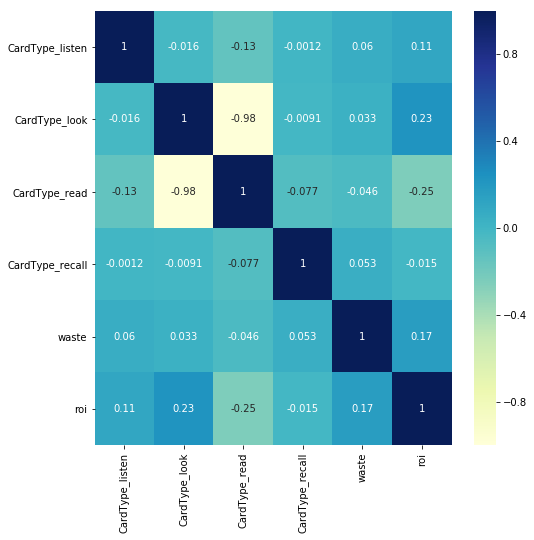

In [757]:
corr_card = df_cards_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax_card = sns.heatmap(corr_card, vmin=-1, cmap="YlGnBu", annot=True)
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

# Inspect note correlations visually

In [758]:
#show correlation of stats via heatmap
df_notes_001_corr = df_notes.copy()
df_notes_001_corr = df_notes_001_corr.drop(list(
    ["nid",'jlpt_lvl_d','no_waste'] +
    card_list + convo_list + numeric_note_fields + genre_list + 
    source_list + jlpt_list + char_list + has_list + 
    other_list + len_list + note_quintiles), axis=1)

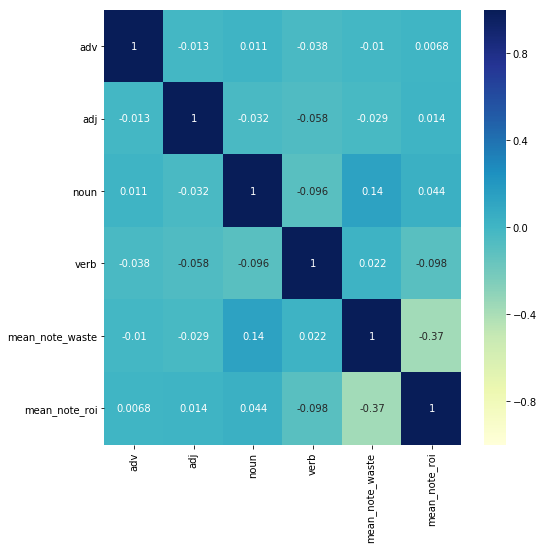

In [759]:
# Inspect the correlation between word type & mean note ROI & mean note waste
corr = df_notes_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

In [760]:
df_notes_002_corr = df_notes.copy()
df_notes_002_corr = df_notes_002_corr.drop(list(
    ["nid","total_reps","total_lapses",'no_waste'] + 
    numeric_note_fields + source_list + convo_list + pos_list + len_list + other_list + 
    has_list + genre_list + jlpt_list + card_list + note_quintiles + ['jlpt_lvl_d','mean_factor']), axis=1)

# Inspect correlations by script

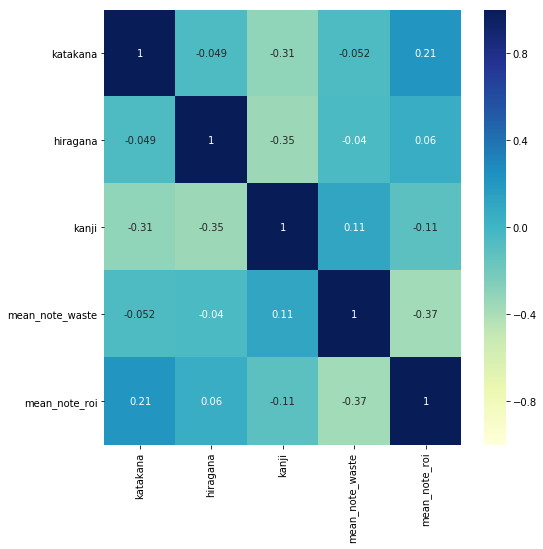

In [761]:
#show correlation of stats via heatmap
corr2 = df_notes_002_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax2 = sns.heatmap(corr2, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

In [762]:
df_notes_003_corr = df_notes.copy()
df_notes_003_corr = df_notes_003_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor','no_waste'] + 
    numeric_note_fields + convo_list + char_list + pos_list + len_list + other_list + 
    has_list + genre_list + jlpt_list + card_list + note_quintiles), axis=1)

# Inspect correlations by word first encounter

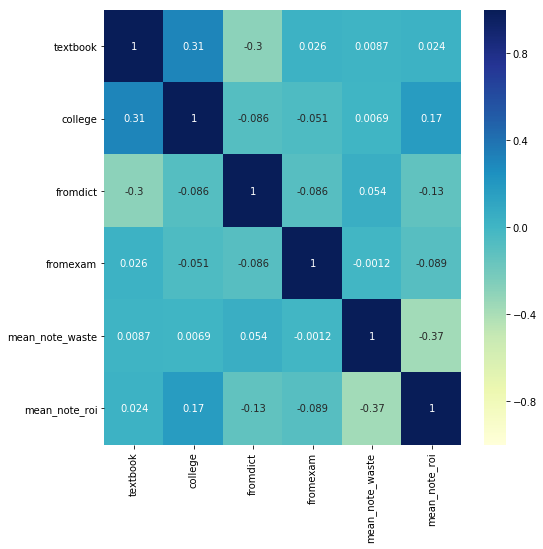

In [763]:
#show correlation of stats via heatmap
corr3 = df_notes_003_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax3 = sns.heatmap(corr3, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

In [764]:
df_notes_004_corr = df_notes.copy()
df_notes_004_corr = df_notes_004_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor',
     'commonword','no_waste'] + numeric_note_fields + char_list + source_list + 
    pos_list + len_list + has_list + genre_list + jlpt_list + card_list + note_quintiles), axis=1)

# Inspect correlation of convo ok'd vs not, & metadata poorness

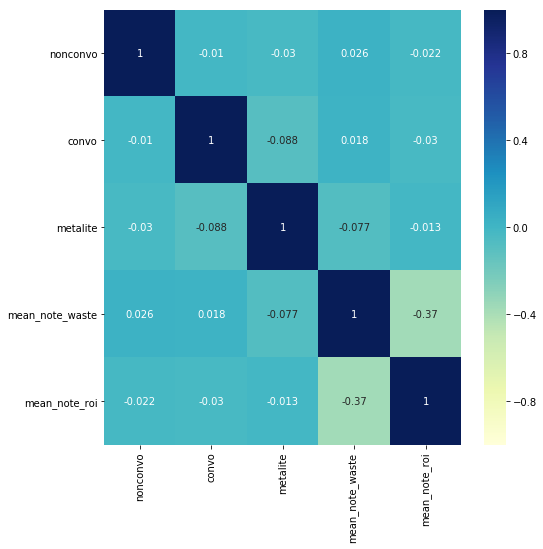

In [765]:
#show correlation of stats via heatmap
corr4 = df_notes_004_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax4 = sns.heatmap(corr4, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

# Inspect field data correlations

In [766]:
df_notes_005_corr = df_notes.copy()
df_notes_005_corr = df_notes_005_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor',
     'metalite','no_waste']+other_list+convo_list+char_list+numeric_note_fields+
    source_list+pos_list+len_list+genre_list+jlpt_list+card_list + note_quintiles), axis=1)

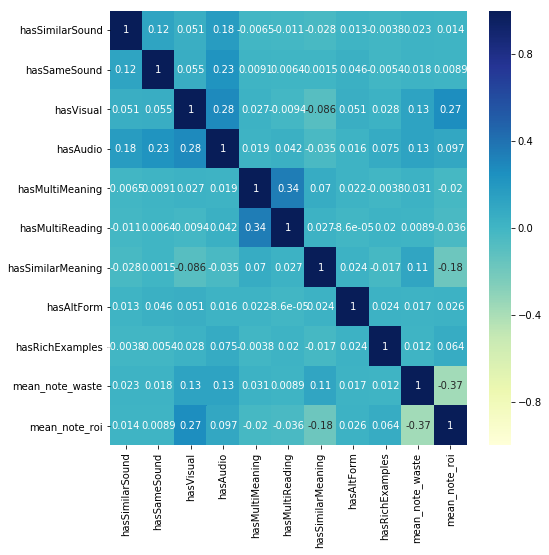

In [767]:
#show correlation of stats via heatmap
corr5 = df_notes_005_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax5 = sns.heatmap(corr5, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

In [768]:
df_cards_002_describe = df_cards.copy()
df_cards_002_describe = df_cards_002_describe.drop(list(["cid","nid",'c_ivl_q','c_factor_q']+type_list), axis=1)

df_cards_002_describe.describe()

,ivl,factor,reps,lapses,waste,roi
count,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000
mean,328.238034,1723.182287,15.718401,0.612353,0.105543,28.259684
std,263.412200,388.438413,9.128434,1.186036,0.035221,25.140055
min,1.000000,1300.000000,5.000000,0.000000,0.033333,0.008850
25%,167.000000,1300.000000,10.000000,0.000000,0.076923,10.055556
50%,240.000000,1680.000000,13.000000,0.000000,0.100000,20.127717
75%,416.750000,2050.000000,19.000000,1.000000,0.125000,39.333333
max,2148.000000,2710.000000,113.000000,16.000000,0.210526,114.000000


In [769]:
df_cards_002_describe.corr()

,ivl,factor,reps,lapses,waste,roi
ivl,1.000000,0.286049,-0.219855,-0.243738,-0.105588,0.827430
factor,0.286049,1.000000,-0.653210,-0.403545,0.480306,0.618571
reps,-0.219855,-0.653210,1.000000,0.864210,-0.145013,-0.505364
lapses,-0.243738,-0.403545,0.864210,1.000000,0.309341,-0.399184
waste,-0.105588,0.480306,-0.145013,0.309341,1.000000,0.170233
roi,0.827430,0.618571,-0.505364,-0.399184,0.170233,1.000000


# Plot ROI trends for cards using linear regression

In [770]:
import numpy as np
import statsmodels.formula.api as smf

In [771]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('roi ~ ivl + factor - 1', data=df_cards).fit()

In [772]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 2.462e+04
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        01:23:47   Log-Likelihood:                -27971.
No. Observations:                6978   AIC:                         5.595e+04
Df Residuals:                    6976   BIC:                         5.596e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ivl            0.0678      0.001    107.272      0.000       0.067       0.069
factor         0.0046      0.000     30.656      0.000       0.004       0.005
==============================================================================
Omnibus:                     1868.550   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6929.276
Skew:                           1.302   Prob(JB):                         0.00
Kurtosis:                       7.130   Cond. No.                         7.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot ROI trends for notes using linear regression (using everything)

In [773]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_roi ~ Syllables + TermLen + mean_reps + total_reps - 1', data=df_notes).fit()

In [774]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mean_note_roi   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1901.
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        01:23:47   Log-Likelihood:                -27197.
No. Observations:                5945   AIC:                         5.440e+04
Df Residuals:                    5941   BIC:                         5.443e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Syllables      2.3955      0.231     10.374      0.000       1.943       2.848
TermLen        6.6281      0.335     19.762      0.000       5.971       7.286
mean_reps     -1.2962      0.063    -20.718      0.000      -1.419      -1.174
total_reps     0.8580      0.047     18.122      0.000       0.765       0.951
==============================================================================
Omnibus:                      576.705   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1018.562
Skew:                           0.675   Prob(JB):                    6.64e-222
Kurtosis:                       4.513   Cond. No.                         35.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot ROI trends for notes using linear regression

In [775]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_roi ~ Syllables + TermLen - 1', data=df_notes).fit()

In [776]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mean_note_roi   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3347.
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        01:23:47   Log-Likelihood:                -27405.
No. Observations:                5945   AIC:                         5.481e+04
Df Residuals:                    5943   BIC:                         5.483e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Syllables      1.6303      0.224      7.281      0.000       1.191       2.069
TermLen        6.3687      0.347     18.360      0.000       5.689       7.049
==============================================================================
Omnibus:                      750.536   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1118.167
Skew:                           0.925   Prob(JB):                    1.56e-243
Kurtosis:                       4.043   Cond. No.                         6.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot waste trends for notes using linear regression

In [777]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_waste ~ mean_ivl + mean_factor - 1', data=df_notes).fit()

In [778]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_note_waste   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     879.7
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        01:23:47   Log-Likelihood:                 11233.
No. Observations:                5945   AIC:                        -2.246e+04
Df Residuals:                    5943   BIC:                        -2.245e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
mean_ivl    -9.758e-06   2.06e-06     -4.725      0.000   -1.38e-05   -5.71e-06
mean_factor  1.283e-05   4.57e-07     28.064      0.000    1.19e-05    1.37e-05
==============================================================================
Omnibus:                      828.295   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1231.774
Skew:                           1.115   Prob(JB):                    3.34e-268
Kurtosis:                       2.991   Cond. No.                         8.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**reps** = work done to remember a card  
**interval** = memory length as output of memorization work done  
**ease/factor** = indicator of effort to retreive & store memory  
**lapses** = result of memory deficit, a common side-effect & indicator of inefficiency of memorization efforts  

**lapses/reps ratio** (waste ratio) => the closer to 0, the better ("low waste"). the higher this is, the worse : "high waste"  
**interval/reps ratio** (ROI ratio) = the higher the better ("low effort" / "sticky"). the lower this is, the worse ("high effort", "slippery")  

In [779]:
df_notes_006_corr = df_notes.copy()
df_notes_006_corr = df_notes_006_corr.drop(list(binary_list + card_list + ['nid','jlpt_lvl_d']), axis=1)

In [780]:
df_notes_006_corr.describe()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q,no_waste
count,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.0,5945.000000,5945.000000
mean,2.666274,4.211606,316.935015,1744.220858,15.047463,0.534455,17.528680,0.642220,0.022944,27.277229,1.818335,0.883936,0.0,1.818671,0.653995
std,1.215222,1.693835,236.424008,384.484341,8.341454,0.964820,11.467751,1.161866,0.034749,22.638174,1.323880,0.773892,0.0,1.317174,0.475735
min,1.000000,1.000000,1.000000,1300.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.000000,3.000000,165.000000,1300.000000,10.000000,0.000000,10.000000,0.000000,0.000000,10.437500,1.000000,0.000000,0.0,1.000000,0.000000
50%,2.000000,4.000000,243.000000,1725.000000,13.000000,0.000000,14.000000,0.000000,0.000000,20.000000,2.000000,1.000000,0.0,2.000000,1.000000
75%,3.000000,5.000000,415.000000,2050.000000,18.000000,1.000000,22.000000,1.000000,0.050000,38.400000,3.000000,1.000000,0.0,3.000000,1.000000
max,15.000000,30.000000,1623.500000,2710.000000,81.000000,8.000000,104.000000,13.000000,0.131579,102.866667,4.000000,2.000000,0.0,4.000000,1.000000


In [781]:
df_notes_006_corr.corr()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q,no_waste
TermLen,1.000000,0.687764,0.015251,0.091915,-0.137457,-0.120360,-0.150976,-0.127594,-0.116102,0.093266,0.048268,0.084745,NaN,0.104500,0.126740
Syllables,0.687764,1.000000,-0.053703,0.020096,-0.063777,-0.065062,-0.084793,-0.073510,-0.061438,-0.019700,-0.030945,0.011552,NaN,-0.002782,0.063108
mean_ivl,0.015251,-0.053703,1.000000,0.241358,-0.175158,-0.210456,0.046838,-0.132491,-0.173360,0.824715,0.870305,0.258532,NaN,0.766507,0.120171
mean_factor,0.091915,0.020096,0.241358,1.000000,-0.686601,-0.411295,-0.539259,-0.372225,-0.352021,0.586635,0.324185,0.944139,NaN,0.617547,0.390453
mean_reps,-0.137457,-0.063777,-0.175158,-0.686601,1.000000,0.846738,0.827923,0.789412,0.652851,-0.495320,-0.283862,-0.656069,NaN,-0.582334,-0.648207
mean_lapses,-0.120360,-0.065062,-0.210456,-0.411295,0.846738,1.000000,0.718188,0.938559,0.880313,-0.399791,-0.320011,-0.390075,NaN,-0.501161,-0.761635
total_reps,-0.150976,-0.084793,0.046838,-0.539259,0.827923,0.718188,1.000000,0.831532,0.602464,-0.298483,-0.057768,-0.495475,NaN,-0.368941,-0.655126
total_lapses,-0.127594,-0.073510,-0.132491,-0.372225,0.789412,0.938559,0.831532,1.000000,0.852328,-0.350460,-0.234106,-0.345183,NaN,-0.436723,-0.759994
mean_note_waste,-0.116102,-0.061438,-0.173360,-0.352021,0.652851,0.880313,0.602464,0.852328,1.000000,-0.374146,-0.285909,-0.324252,NaN,-0.470919,-0.907831
mean_note_roi,0.093266,-0.019700,0.824715,0.586635,-0.495320,-0.399791,-0.298483,-0.350460,-0.374146,1.000000,0.802855,0.570650,NaN,0.913990,0.369636


In [782]:
get_rows_by_value_in_col(df_notes, 1523892839900, 'nid')

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,n1,n2,n3,n4,n5,katakana,hiragana,kanji,adv,adj,noun,verb,nonconvo,convo,metalite,hasSimilarSound,hasSameSound,hasVisual,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilarMeaning,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,SyllablesGroup,jlpt_lvl_d,script,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q,no_waste,analysis_cat


In [783]:
get_rows_by_value_in_col(df_cards, 1523892839900, 'nid')

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,c_ivl_q,c_factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,waste,roi


In [784]:
df_notes_n_corr = df_notes.copy()
df_notes_n_corr = df_notes_n_corr.drop(list(binary_list + card_list + 
    ['nid','tags','Term','Yomi1','jlpt_lvl_d','total_reps','total_lapses',
     'n_ivl_q', 'n_factor_q', 'n_waste_q', 'n_roi_q', 'no_waste']), axis=1)

In [785]:
df_notes_n_corr.columns.values

array(['NoteCreated', 'LastModified', 'TermLen', 'Syllables',
       'TermLenGroup', 'SyllablesGroup', 'script', 'mean_ivl',
       'mean_factor', 'mean_reps', 'mean_lapses', 'mean_note_waste',
       'mean_note_roi', 'analysis_cat'], dtype=object)

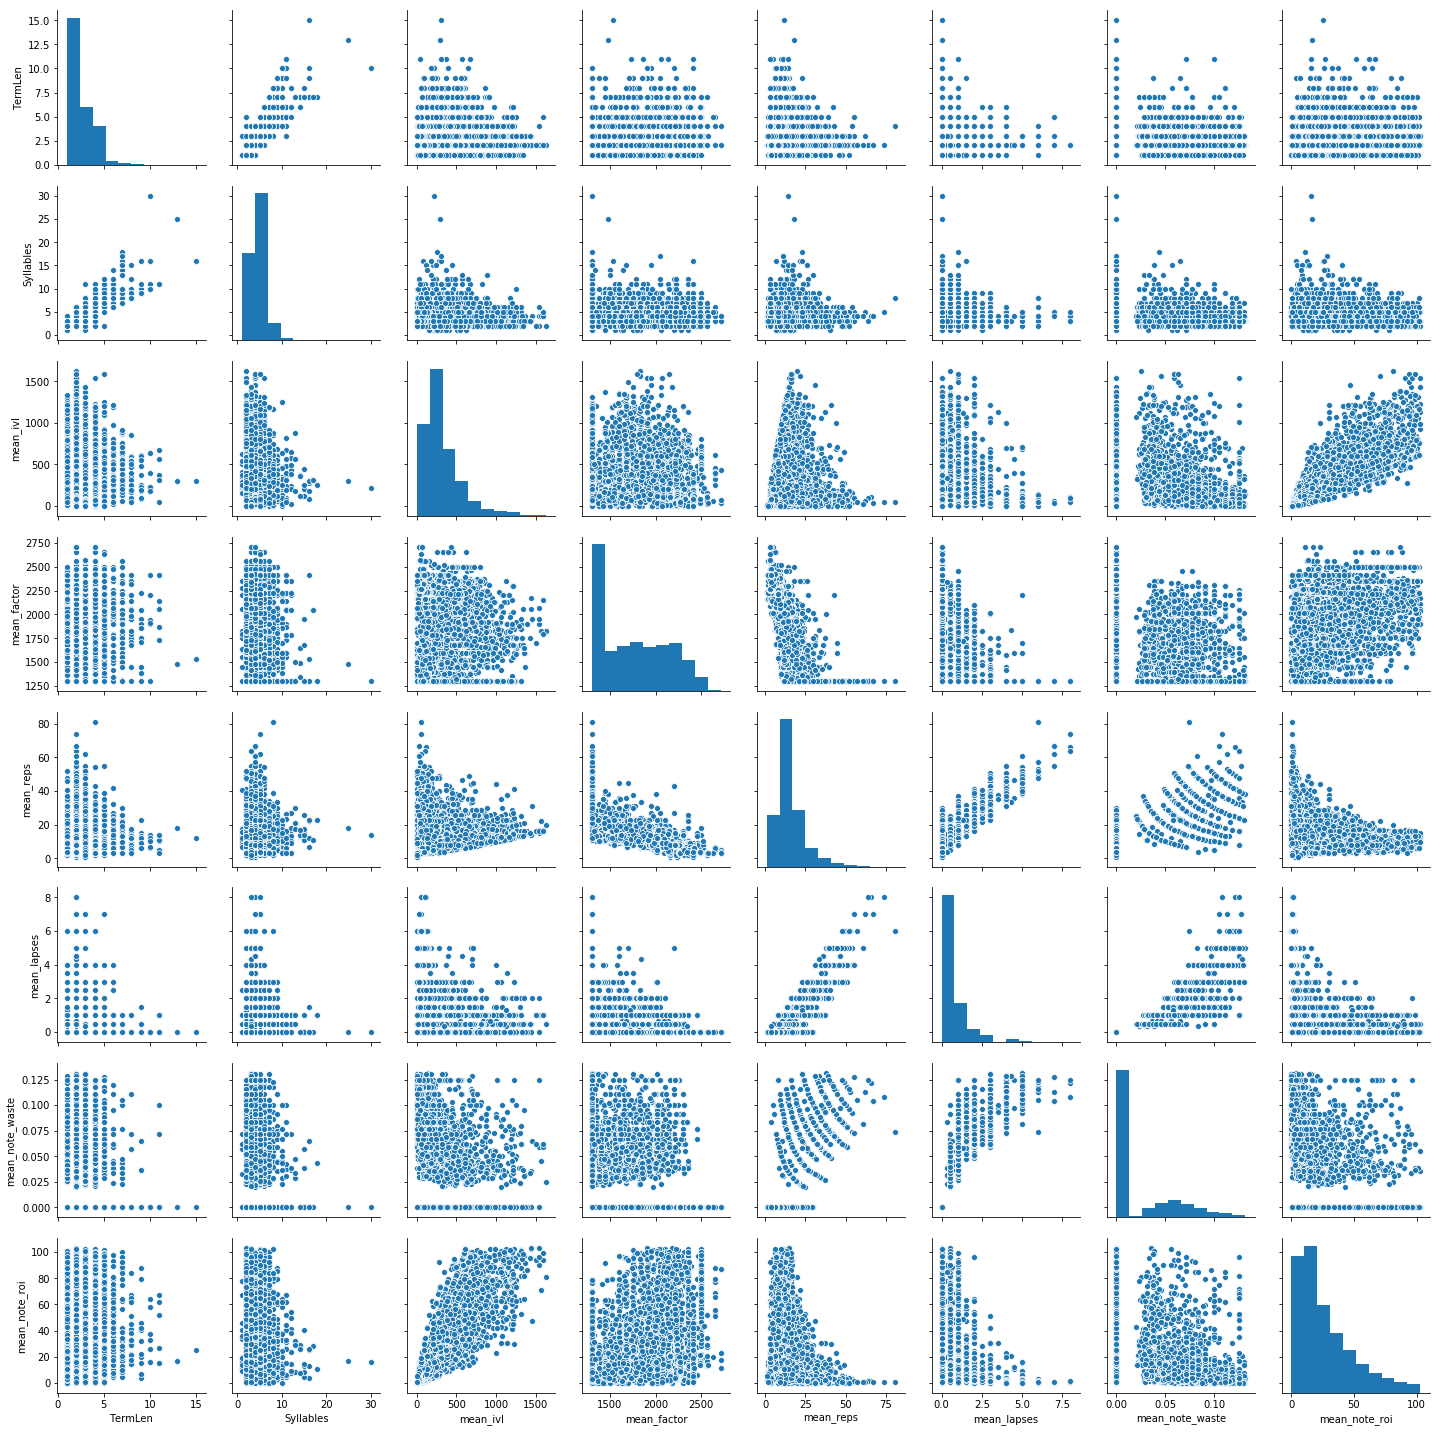

In [786]:
# Basic correlogram
sns.pairplot(df_notes_n_corr)
g.fig.suptitle("Note Correlogram", y=1.05, fontsize=24)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1
plt.show()

In [787]:
df_cards_n_corr = df_cards.copy()

df_cards_n_corr = df_cards_n_corr.drop(['cid','nid','CardType_listen','DueDate',
    'CardType_look','CardType_read','CardType_recall','c_ivl_q', 'c_factor_q'], axis=1)

df_cards_n_corr.columns.values

array(['ivl', 'factor', 'reps', 'lapses', 'CardCreated', 'cardtype',
       'waste', 'roi'], dtype=object)

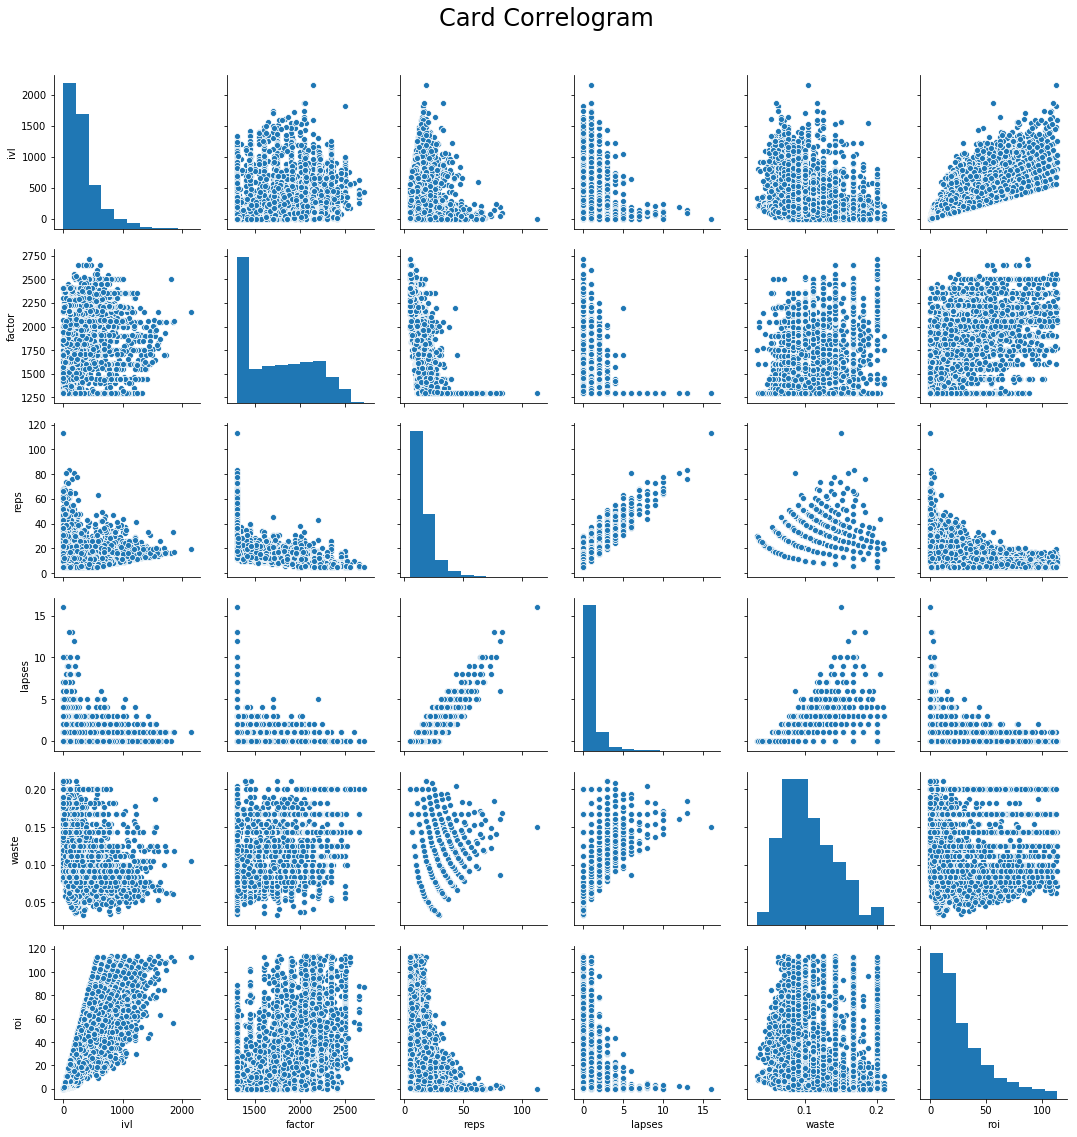

In [788]:
# Basic correlogram
g = sns.pairplot(df_cards_n_corr)
g.fig.suptitle("Card Correlogram", y=1.05, fontsize=24)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1
plt.show()

# Intitial Analysis

There appears to be a linear relationship between lapses & reps. It appears that lapses incur a cost of increasing reps. However, this info isn't directly actionable - one cannot simply just 'not forget'. The primary focus is what can be done to minimize lapses while not sacrificing efficiency (long intervals for few reps, and lapses as close as possible to 0).

# Topical Analysis

After doing some basic assessments of the data, we can dig a bit deeper:
- Is there a correlation between words having multiple readings ("yomi") and their forget rate\*?
- Is there a correlation between words having same/similar sounding words and their forget rate\*?
- What might the effect of word length be on memorability? \*\*, \*\*\*

> \* Forget rate can be understand as a multitude of things, such as the ratio between lapses & reps, as well as the raw lapse count, the average interval, and other numbers/ratios to be determined. I will attempt to clarify this in the process.  
\*\* Memorability being loosely correlated with forget rate, where memorability could be understood as a word/term's intrinsic "stickiness" in the brain, as opposed to an individual or collective's capacity to keep words/terms in their head. Sources pending.  
\*\*\* A huge caveat here being that, this dataset has a sample size of 1 (for both student and language), so all observations, interpretations, and understandings must be taken with more than a few grains of salt (and tested further with larger sample sizes, of at least 200 students, and 5 or more languages).

# Further Analysis

For a deeper understanding of what it means to aquire new terminology, the researcher believes it best to conduct analysis on term acquisition by merging multiple vectors (individual cards) of a single term into single entries, where dummy values for each vector (such as review count, lapse count, etc.) are encoded per entry. This would enable inspection and correlation analysis of:
- total reviews per term
- average ratio of reviews per term per vector (look vs hear vs recall vs read)
- where lapses are most likely to occur (per word, per vector, etc.)
- how word length, presence of kanji, katakana, hirgana, or combination thereof, may affect the above counts & ratios

# Further Information

The Spaced Repetition Software (\"SRS\") used for the study of Japanese by student \"A\" is an open souce program called Anki. The algorithm used by it to \"graduate\" (also refered to as \"maturing\") study items (called cards) so that subsequent reviews/practices will be spaced into the future is referred to as SM-2. [Please click here for more information on the SM-2 algorithm used in Anki.]("https://apps.ankiweb.net/docs/manual.html#what-algorithm")